## Pipeline:

##### 1. Missing Values 
    Categorical
    Numerical
    DateTime

##### 2. Data Types
    Numerical
    Categorical

##### 3. Transformation
    Row deletion with respect to threshold
    Filling missing values of both categorical and numeric data
    Changing column types

##### 4. Outliers
    Dist Plots
    Box Plots

##### 5. Descrpitive Stats

    Bar charts
    Distribution 
    Heatmaps
    Scatter Plots
##### 6. Inferential Analysis

    T-Test
    Chi-Square Test
    ANOVA
    Tukey Test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
#Read csv file
df = pd.read_csv("dirty.data.csv",encoding="unicode_escape")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,1.0,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,2.0,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,3.0,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,NaN,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,NaN,abc


In [3]:
#Get number of rows and columns
df.shape

(10886, 14)

In [4]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10882 non-null  object 
 1   season      10877 non-null  float64
 2   holiday     10879 non-null  object 
 3   workingday  10878 non-null  float64
 4   weather     10879 non-null  float64
 5   temp        10876 non-null  float64
 6   atemp       10879 non-null  float64
 7   humidity    10873 non-null  float64
 8   windspeed   10874 non-null  object 
 9   casual      10878 non-null  float64
 10  registered  10877 non-null  float64
 11  count       10875 non-null  object 
 12  total       3 non-null      float64
 13  Products    10879 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.2+ MB


In [5]:
#Dealing with null values
print(df.isna().sum())

datetime          4
season            9
holiday           7
workingday        8
weather           7
temp             10
atemp             7
humidity         13
windspeed        12
casual            8
registered        9
count            11
total         10883
Products          7
dtype: int64


In [6]:
#Dealing with null values
df.isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10882,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10883,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10884,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
#dealing with null values
df.isnull().values.any(axis=1)

array([False, False, False, ...,  True,  True,  True])

In [8]:
df.isnull().any(axis = 1).sum() #total number of rows with missing data

10883

In [9]:
df.isnull().sum() / df.shape[0] * 10000.00 #missing values as a percentage

datetime         3.674444
season           8.267500
holiday          6.430277
workingday       7.348888
weather          6.430277
temp             9.186111
atemp            6.430277
humidity        11.941944
windspeed       11.023333
casual           7.348888
registered       8.267500
count           10.104722
total         9997.244167
Products         6.430277
dtype: float64

<AxesSubplot:>

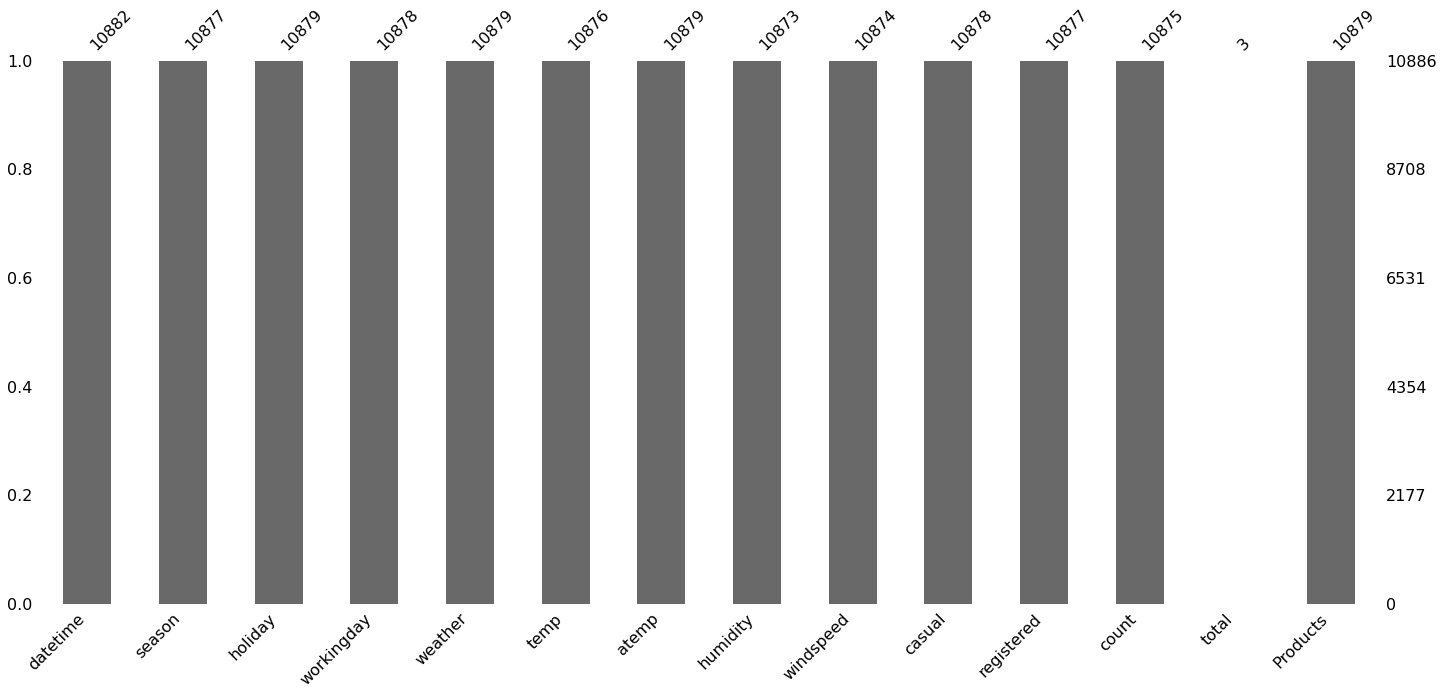

In [10]:
msno.bar(df) #visualizing missing values

<AxesSubplot:>

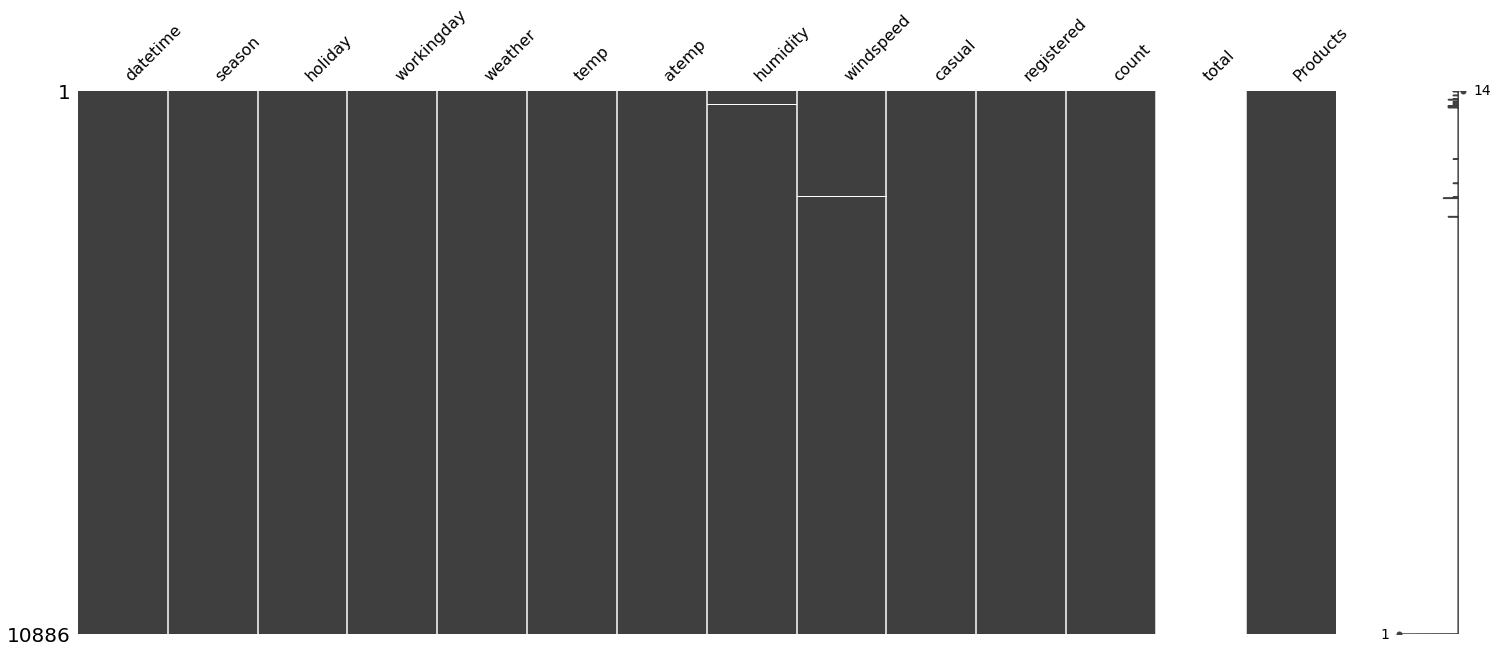

In [11]:
# Missing data visualization
msno.matrix(df)

In [12]:
#set threshold for columns with missing values
max_number_of_nas = 3000
df.drop(df.columns[df.isnull().sum(axis=0) > max_number_of_nas], axis=1, inplace=True)

In [13]:
#set threshold for rows with missing values
def remove_column_missing_val(df, thr):
    perc = thr
    min_count =  int(((100-perc)/100)*df.shape[1] + 1)
    mod_df = df.dropna( axis=1, thresh=min_count)
    return mod_df

missing = remove_column_missing_val(df,10)
missing.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
10881,12/19/2012 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10882,12/19/2012 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10883,12/19/2012 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,12/19/2012 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10885,12/19/2012 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Only columns with missing values, the total number along with the %age
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
#call the function
xyz = missing_values_table(df)
print(xyz)

Your selected dataframe has 13 columns.
There are 13 columns that have missing values.
            Missing Values  % of Total Values
humidity                13                0.1
windspeed               12                0.1
count                   11                0.1
temp                    10                0.1
season                   9                0.1
registered               9                0.1
workingday               8                0.1
casual                   8                0.1
holiday                  7                0.1
weather                  7                0.1
atemp                    7                0.1
Products                 7                0.1
datetime                 4                0.0


In [16]:
# Remove rows based on a missing value threshold
def remove_row_missing_val(df, thr):
    perc = thr
    min_count =  int(((100-perc)/100)*df.shape[1] + 1)
    mod_df = df.dropna( axis=0, thresh=min_count)
    return mod_df

missing = remove_row_missing_val(df,10)
missing.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
10874,12/19/2012 12:00,4.0,0,1.0,1.0,16.40,20.455,54.0,19.0012,33.0,203.0,236,stu
10875,12/19/2012 13:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,30.0,183.0,213,stu
10876,12/19/2012 14:00,4.0,0,1.0,1.0,17.22,21.210,50.0,12.998,33.0,185.0,218,stu
10877,12/19/2012 15:00,4.0,0,1.0,1.0,17.22,21.210,50.0,19.0012,28.0,209.0,237,stu
10878,12/19/2012 16:00,4.0,0,1.0,1.0,17.22,21.210,50.0,23.9994,37.0,297.0,334,stu


<AxesSubplot:>

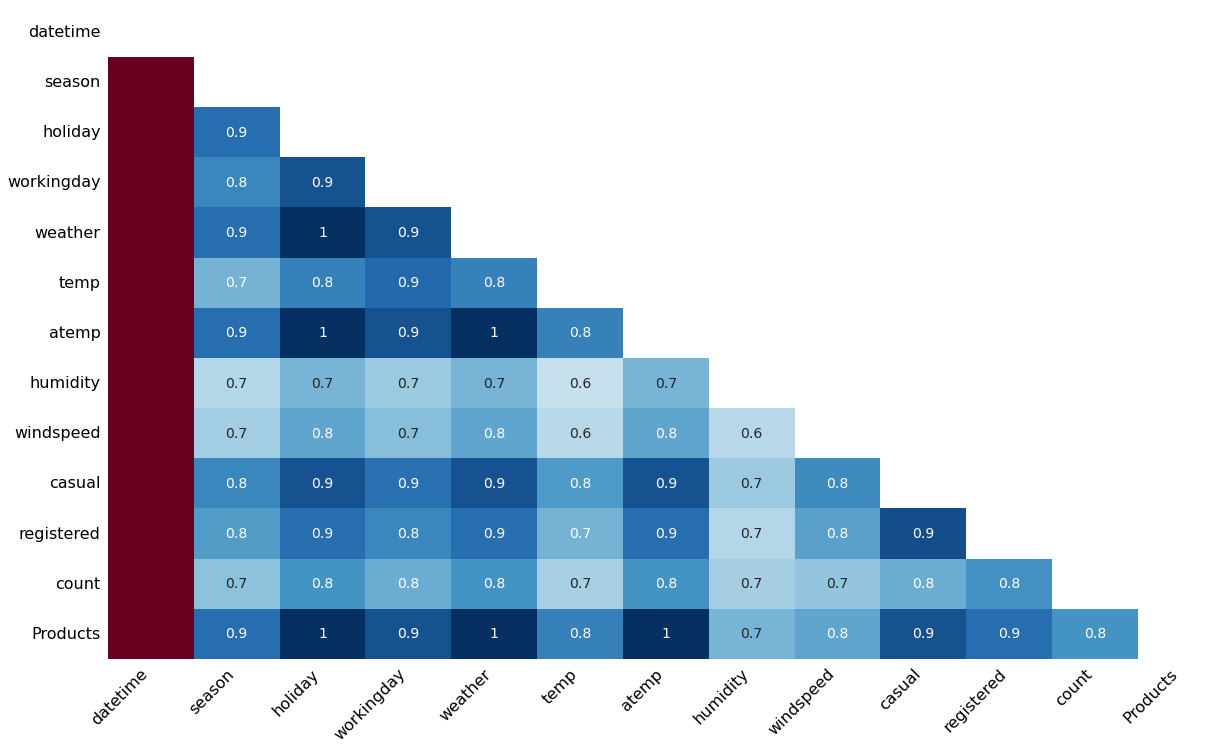

In [17]:
msno.heatmap(df)

<AxesSubplot:>

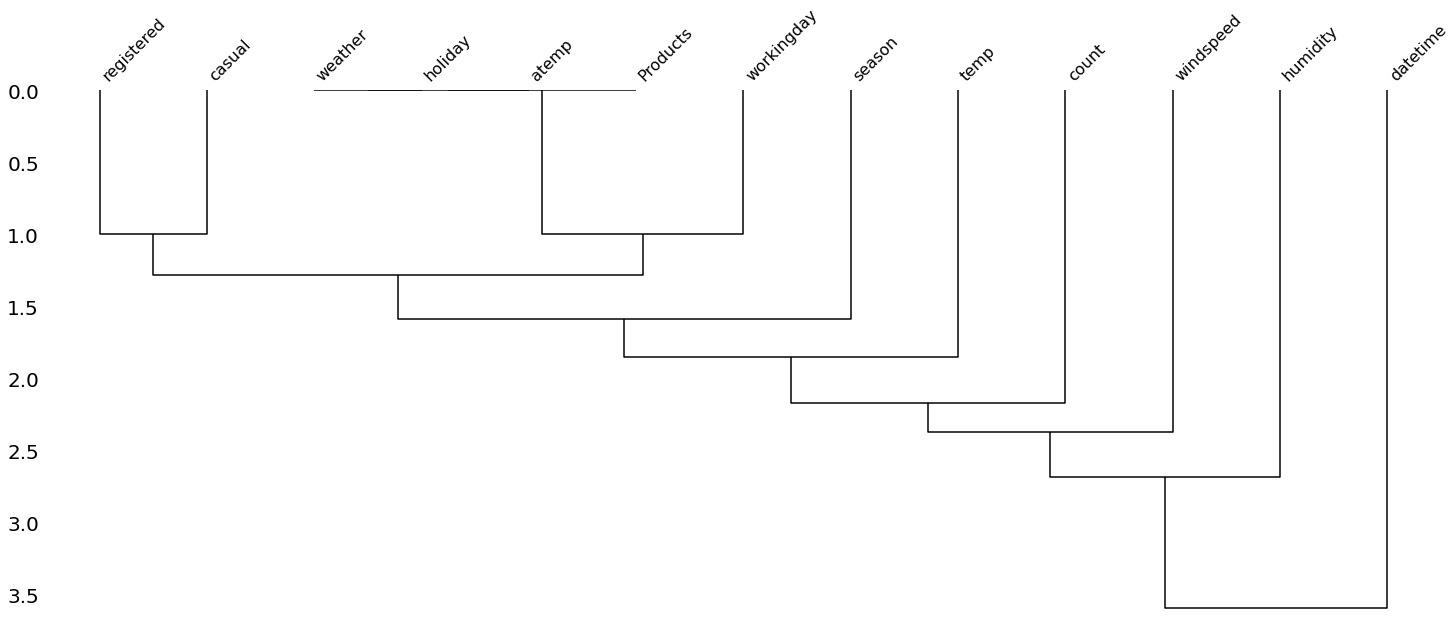

In [18]:
msno.dendrogram(df)

In [19]:
#return numeric columns
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns
numeric_columns = get_num_cols(df)
print(numeric_columns)

['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'casual', 'registered']


In [20]:
#return categorical columns
def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns
categorical = get_cat_cols(df)
print(categorical)

['datetime', 'holiday', 'windspeed', 'count', 'Products']


In [21]:
#print counts
for col in categorical:
    print(df[col].value_counts())
    print()
    
for col in numeric_columns:
    print(df[col].value_counts())
    print()

1/1/2011 0:00       1
5/1/2012 22:00      1
5/1/2012 14:00      1
5/1/2012 15:00      1
5/1/2012 16:00      1
                   ..
9/2/2011 7:00       1
9/2/2011 8:00       1
9/2/2011 9:00       1
9/2/2011 10:00      1
12/19/2012 23:00    1
Name: datetime, Length: 10882, dtype: int64

0        10567
1          311
hello        1
Name: holiday, dtype: int64

0          1312
8.9981     1119
11.0014    1057
12.998     1042
7.0015     1032
15.0013     959
6.0032      871
16.9979     823
19.0012     676
19.9995     492
22.0028     372
23.9994     272
26.0027     232
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
why not       1
Name: windspeed, dtype: int64

5      169
4      149
3      144
6      135
2      132
      ... 
831      1
793      1
700      1
869      1
636      1
Name: count, Length: 82

In [22]:
#check
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(numeric_data)
print(categorical_data)


       season  workingday  weather  temp   atemp  humidity  casual  registered
0         1.0         0.0      1.0  9.84  14.395      81.0     3.0        13.0
1         1.0         0.0      1.0  9.02  13.635      80.0     8.0        32.0
2         1.0         0.0      1.0  9.02  13.635      80.0     5.0        27.0
3         1.0         0.0      1.0  9.84  14.395      75.0     3.0        10.0
4         1.0         0.0      1.0  9.84  14.395      75.0     0.0         1.0
...       ...         ...      ...   ...     ...       ...     ...         ...
10881     NaN         NaN      NaN   NaN     NaN       NaN     NaN         NaN
10882     NaN         NaN      NaN   NaN     NaN       NaN     NaN         NaN
10883     NaN         NaN      NaN   NaN     NaN       NaN     NaN         NaN
10884     NaN         NaN      NaN   NaN     NaN       NaN     NaN         NaN
10885     NaN         NaN      NaN   NaN     NaN       NaN     NaN         NaN

[10886 rows x 8 columns]
               datetime ho

In [23]:
# Changing data type of columns. (Based on inuition)
new_df = df.astype({'holiday': 'object', 'weather': 'object'})

Descriptive stats

In [24]:
# Box Plot
def box_plots(num_cols, df):
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.boxplot(x = df[num_cols[i]])

# Distribution plots
def dis_plots(num_cols, df): 
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.displot(x = df[num_cols[i]])

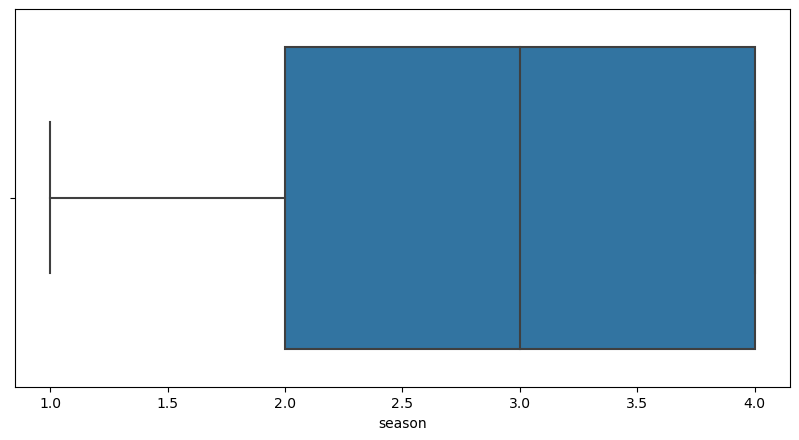

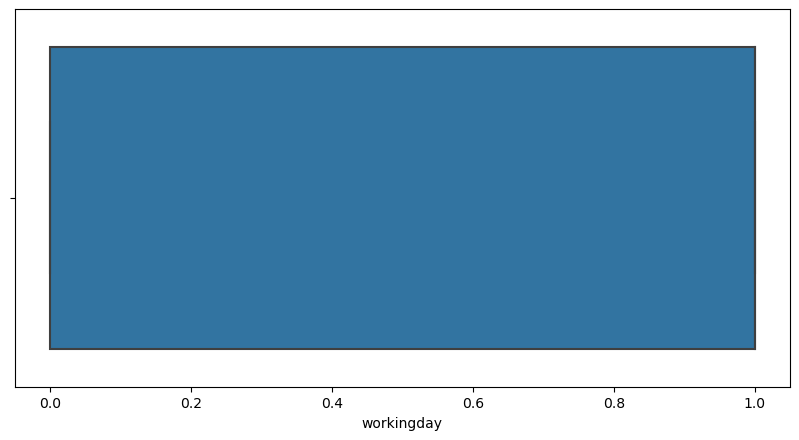

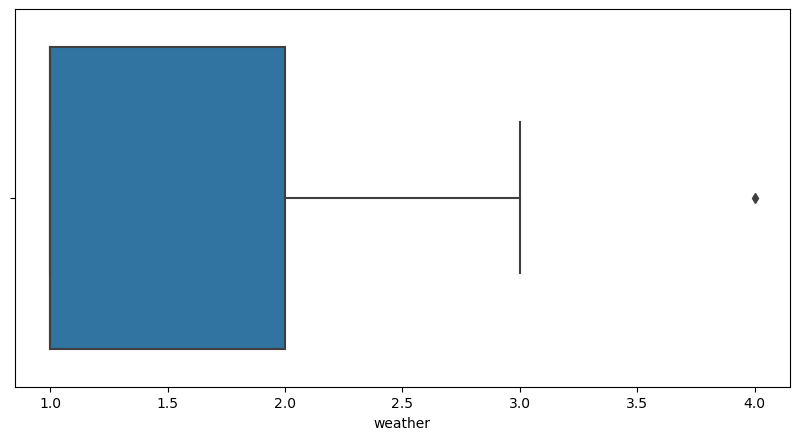

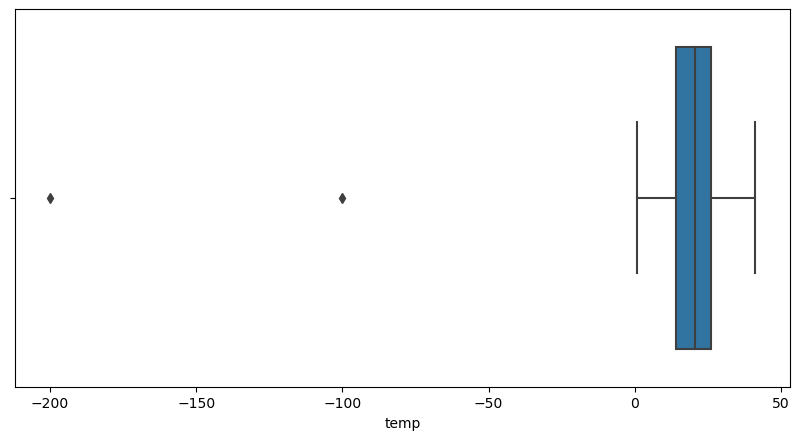

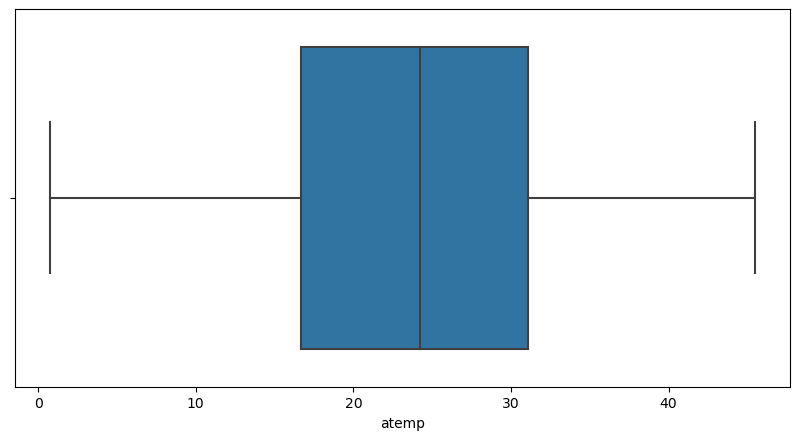

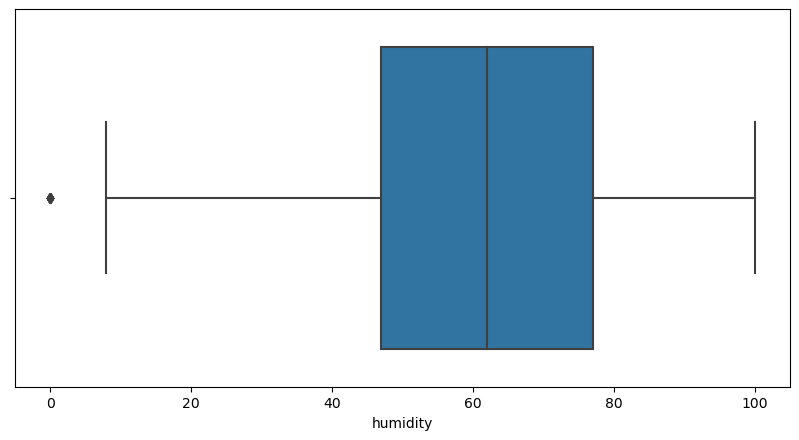

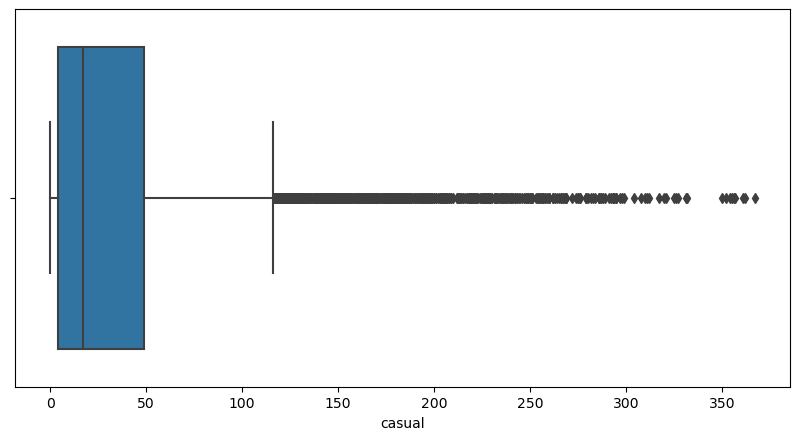

In [25]:
box_plots(numeric_columns, df)

<Figure size 1000x500 with 0 Axes>

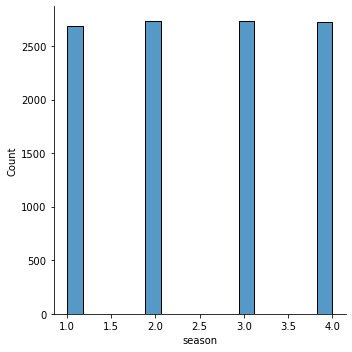

<Figure size 1000x500 with 0 Axes>

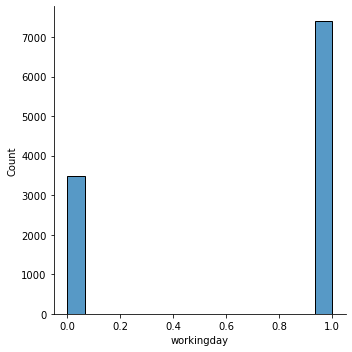

<Figure size 1000x500 with 0 Axes>

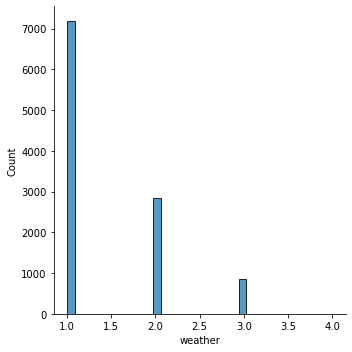

<Figure size 1000x500 with 0 Axes>

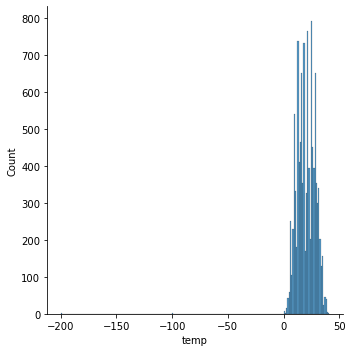

<Figure size 1000x500 with 0 Axes>

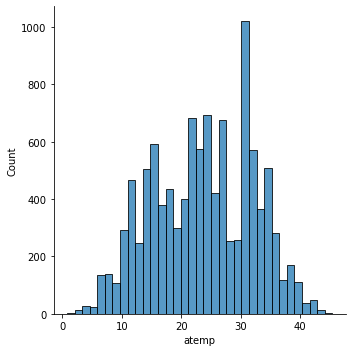

<Figure size 1000x500 with 0 Axes>

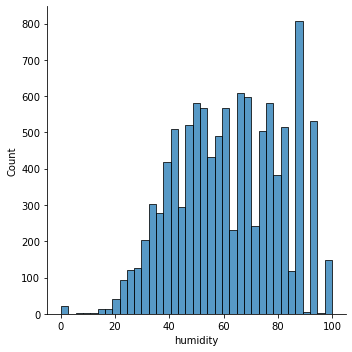

<Figure size 1000x500 with 0 Axes>

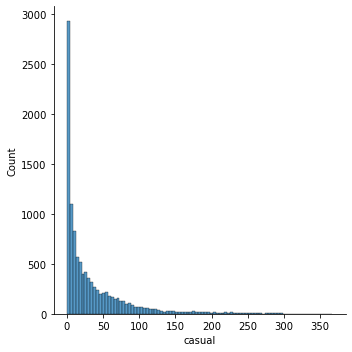

In [26]:
dis_plots(numeric_columns, df)

<AxesSubplot:>

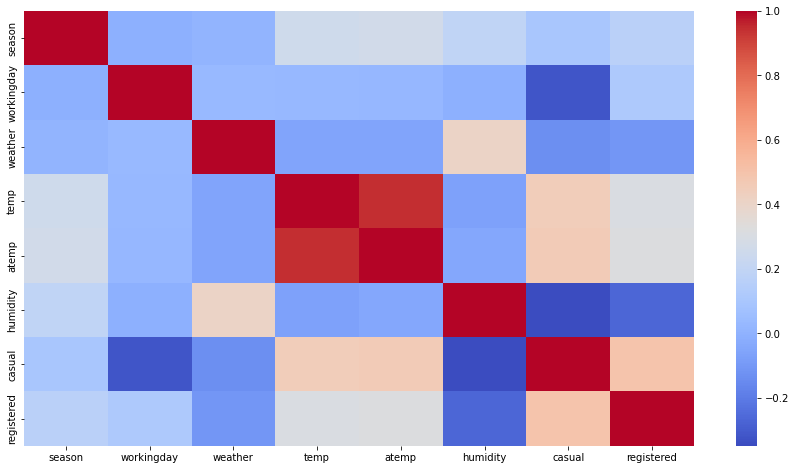

In [27]:
#heatmap for correlation
fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap= 'coolwarm')

In [28]:
#use interpolation for numeric columns
df.interpolate(method ='linear', limit_direction ='forward')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4.0,NaN,1.0,1.0,17.22,21.210,50.0,NaN,37.0,297.0,NaN,NaN
10882,12/19/2012 20:00,4.0,NaN,1.0,1.0,17.22,21.210,50.0,NaN,37.0,297.0,NaN,NaN
10883,12/19/2012 21:00,4.0,NaN,1.0,1.0,17.22,21.210,50.0,NaN,37.0,297.0,NaN,NaN
10884,12/19/2012 22:00,4.0,NaN,1.0,1.0,17.22,21.210,50.0,NaN,37.0,297.0,NaN,NaN


In [29]:
#user mode for cetgorical
df=df.fillna(df.mode().iloc[0])

In [30]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.505512,1.115439,1.00,2.000,3.00,4.00,4.000
workingday,10886.0,0.680966,0.466124,0.00,0.000,1.00,1.00,1.000
weather,10886.0,1.418427,0.633839,1.00,1.000,1.00,2.00,4.000
temp,10886.0,20.202096,8.152036,-200.00,13.940,20.50,26.24,41.000
atemp,10886.0,23.663365,8.475441,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,61.930277,19.260352,0.00,47.000,62.00,77.00,100.000
casual,10886.0,36.009921,49.965884,0.00,4.000,17.00,49.00,367.000
registered,10886.0,155.351828,150.993513,0.00,36.000,118.00,222.00,886.000


In [31]:
def bar_charts(num_cols, cat_cols, df):
    for i in range(3):     #(len(numeric_columns)-1):
        for j in range(3): #(len(categorical_columns)-1):
            pvt = df.pivot_table(columns=[categorical[j]], values=numeric_columns[i], aggfunc='mean').round(2)
            pvt.plot.bar()

In [ ]:
bar_charts(numeric_columns, categorical, df)

C:\Users\Abdullah\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [ ]:
# Extracting Year, Quarter, Month, Day from the Date column
#df['Year'] = df['datetime'].dt.year
#df['Quarter'] = df['datetime'].dt.quarter
#df['Month'] = df['datetime'].dt.month
#df['Day'] = df['datetime'].dt.day

# Inferential Testing

In [ ]:
# T-Test

def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [ ]:
t_test(df)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()